In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# print all columns
pd.set_option('display.max_columns', None)

In [11]:
# import data
df = pd.read_csv("abalone.csv", names = ['sex','length','diameter','height','whole_weight','shucked_weight','viscera_weight','shell_weight','rings'])
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [13]:
df.shape

(4177, 9)

# EDA

In [15]:
# drop duplicates
df.drop_duplicates(inplace=True)
df.shape

(4177, 9)

In [16]:
# summary stats
df.describe(include = 'all')

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000


In [18]:
# check na
df.isna().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

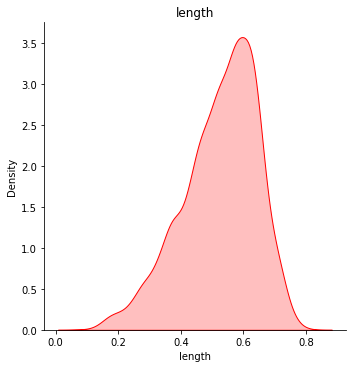

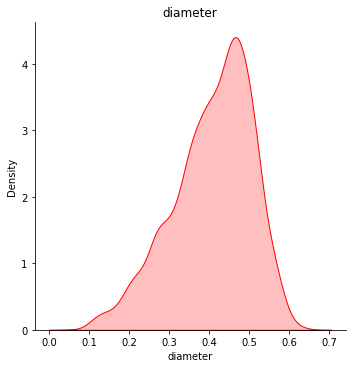

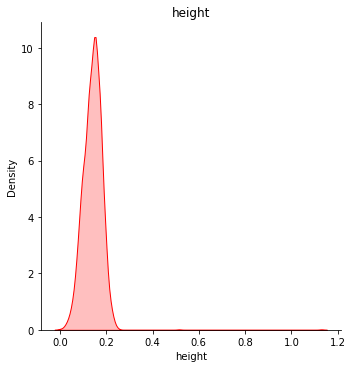

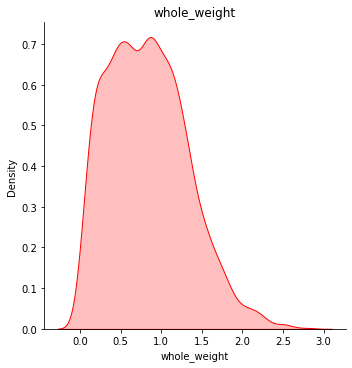

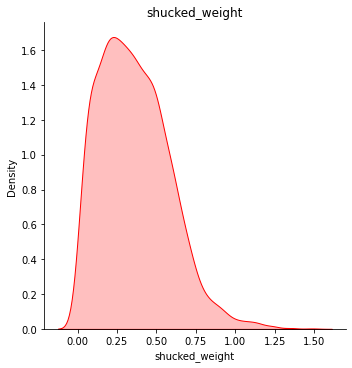

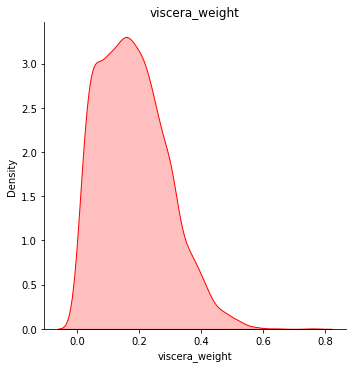

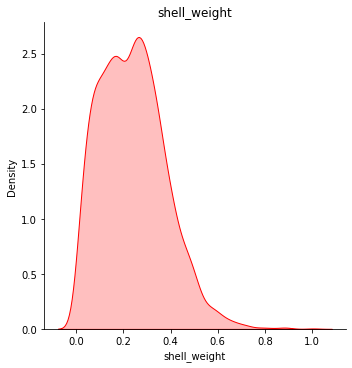

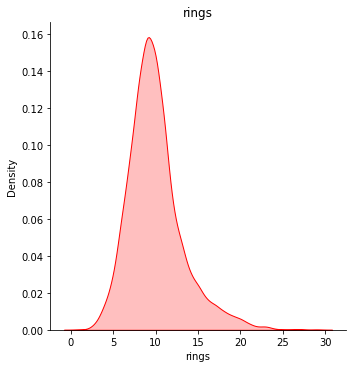

In [23]:
# checking dsitributions
for e in df.columns[1:]:
    sns.displot(df[e], kind = 'kde', color='red', fill = True)
    plt.title(e)

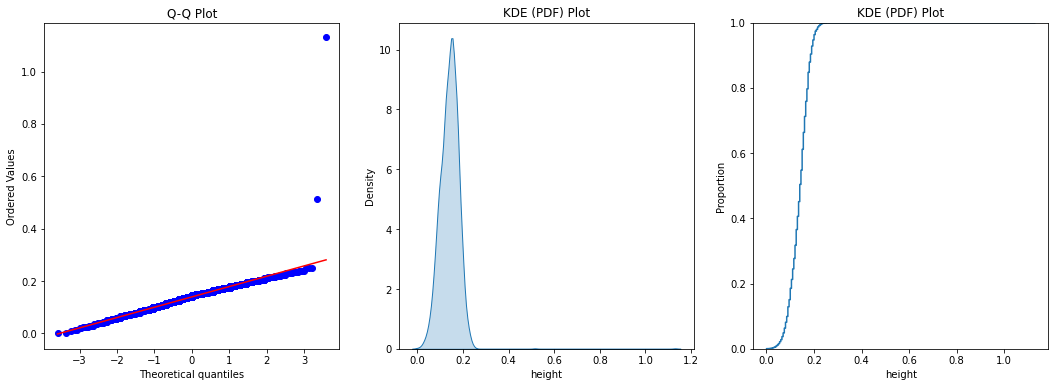

In [25]:
# function to check normality
# pdf, cdf and qq plot
def prob_plots(x):
    from scipy.stats import probplot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))

    res = probplot(x, plot = ax[0])
    ax[0].set_title("Q-Q Plot")

    ax[1] = sns.kdeplot(x, fill = True, ax = ax[1])
    ax[1].set_title("KDE (PDF) Plot")

    ax[2] = sns.ecdfplot(x, ax = ax[2])
    ax[2].set_title("KDE (PDF) Plot")

# checking height
prob_plots(df['height'])

`height` has two outliers which, if fixed, can make the distribution normal

In [44]:
# fixing outliers for height
# function to get outliers and fix them
def outlier_fix(x):
    import numpy as np
    import pandas as pd
    
    # we will use values > 1.5(IQR) as outliers and equate them to the 90th/10th percentile values 
    
    iqr = np.subtract(*np.percentile(x, [75, 25]))
    iqr_upper_bound = 1.5*iqr + np.percentile(x, 75)
    iqr_lower_bound = np.percentile(x, 25) - 1.5*iqr
    upper_replacement = np.percentile(x, 90)
    lower_replacement = np.percentile(x, 10)
    print("IQR =", iqr)
    print("Upper, Lower Bound for Outliers =", iqr_upper_bound, ",", iqr_lower_bound)
    print("Values to replace outliers with =", upper_replacement, ",", lower_replacement)
    print("Number of Outliers =", len(x[(x > iqr_upper_bound) | (x < iqr_lower_bound)]))
    
    return iqr, iqr_upper_bound, iqr_lower_bound, upper_replacement, lower_replacement

outlier_fix(df['height'])

IQR = 0.05
Upper, Lower Bound for Outliers = 0.24000000000000002 , 0.039999999999999994
Values to replace outliers with = 0.185 , 0.09
Number of Outliers = 27


(0.05, 0.24000000000000002, 0.039999999999999994, 0.185, 0.09)

In [42]:
# we will equate outliers to upper limit (0.9 IQR)
df.loc[(df['height'] > 0.25), 'height'] = 0.24

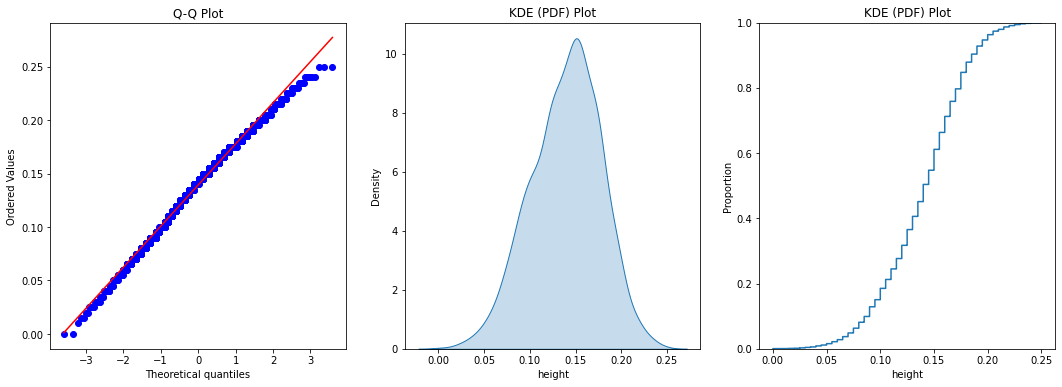

In [43]:
prob_plots(df['height'])

## Fixing Outliers in Remaining Features

In [48]:
# fixing outliers for height
# function to get outliers and fix them
def outlier_fix(x):
    import numpy as np
    import pandas as pd
    
    # we will use values > 1.5(IQR) as outliers and equate them to the 90th/10th percentile values 
    
    iqr = np.subtract(*np.percentile(x, [75, 25]))
    iqr_upper_bound = 1.5*iqr + np.percentile(x, 75)
    iqr_lower_bound = np.percentile(x, 25) - 1.5*iqr
    upper_replacement = np.percentile(x, 90)
    lower_replacement = np.percentile(x, 10)
    print("IQR =", iqr)
    print("Upper, Lower Bound for Outliers =", iqr_upper_bound, ",", iqr_lower_bound)
    print("Values to replace outliers with =", upper_replacement, ",", lower_replacement)
    print("Number of Outliers =", len(x[(x > iqr_upper_bound) | (x < iqr_lower_bound)]))
    
    return iqr, iqr_upper_bound, iqr_lower_bound, upper_replacement, lower_replacement

for e in df.columns[1:]:
    print(e)
    outlier_fix(df[e])
    print()

length
IQR = 0.16499999999999998
Upper, Lower Bound for Outliers = 0.8624999999999999 , 0.20250000000000004
Values to replace outliers with = 0.66 , 0.355
Number of Outliers = 49

diameter
IQR = 0.13
Upper, Lower Bound for Outliers = 0.675 , 0.15499999999999997
Values to replace outliers with = 0.5220000000000005 , 0.265
Number of Outliers = 59

height
IQR = 0.05
Upper, Lower Bound for Outliers = 0.24000000000000002 , 0.039999999999999994
Values to replace outliers with = 0.185 , 0.09
Number of Outliers = 27

whole_weight
IQR = 0.7115
Upper, Lower Bound for Outliers = 2.22025 , -0.62575
Values to replace outliers with = 1.4782 , 0.205
Number of Outliers = 30

shucked_weight
IQR = 0.316
Upper, Lower Bound for Outliers = 0.976 , -0.288
Values to replace outliers with = 0.647 , 0.0865
Number of Outliers = 48

viscera_weight
IQR = 0.1595
Upper, Lower Bound for Outliers = 0.49225 , -0.14575000000000002
Values to replace outliers with = 0.326 , 0.043300000000000005
Number of Outliers = 26

s

Too many values still outside the `1.5xIQR` range so we will leave them as is.